# Generalizing our definition of vectors

Vector spaces are collections of objects we can treat like vectors.   
The key operations in a vector space are vector addition and scalar multiplication.

## 6.1 Generalizing our definition of vectors

 In our case, we want to realize the 2D and 3D vectors we’ve already seen as instances of a more general class of objects simply called vectors. Then any other objects that inherit behaviors from the parent class can rightly be called vectors as well.

###  6.1.1 Creating a class for 2D coordinate vectors

In [1]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [2]:
v = Vec2(1.6, 3.8)
v.x, v.y

(1.6, 3.8)

In [3]:
v.__dict__

{'x': 1.6, 'y': 3.8}

In [4]:
# implementing addition
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y)

In [5]:
v = Vec2(3,4) # <1> 
w = v.add(Vec2(-2,6)) # <2> 
print(w.x)
print(w.y) # <3>

1
10


Like our original implementation of vector addition, we do not perform the addition “in-place.” That is, the two input vectors are not modified; a new Vec2 object is created to store the sum.

In [6]:
# implementing scale
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)

In [7]:
v = Vec2(1,1)
s = v.scale(50)
s.x

50

There’s one more critical detail we need to take care of: currently the output of a comparison like Vec2(3,4) == Vec2(3,4) is False. This is problematic because these instances represent the same vector. By default, Python compares instances by their references (asking whether they are located in the same place in memory) rather than by their values. 

In [8]:
# implementing equality
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [9]:
Vec2(3,4) == Vec2(3,4) 

True

### 6.1.2 Improving the Vec2 class

As we changed the behavior of the == operator, we can also customize the Python operators + and * to mean vector addition and scalar multiplication, respectively. This is called operator overloading, and it is covered in appendix B:


In [10]:
# implementing operator overloading and __repr__
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __add__(self, other):
        return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __repr__(self):
        return f'Vec2({self.x}, {self.y})'

In [11]:
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1) 

Vec2(3.0, 4.0)

### 6.1.3 Repeating the process with 3D vectors

In [12]:
class Vec3():
    def __init__(self,x,y,z): #1
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __add__(self, other):
        return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar):
        return self.scale(scalar)
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x,self.y, self.z)

In [13]:
2.0 * (Vec3(1,0,0) + Vec3(0,1,0))

Vec3(2.0,2.0,0.0)

In [14]:
def average(v1,v2):
    return 0.5 * v1 + 0.5 * v2

In [15]:
average(Vec2(9.0, 1.0), Vec2(8.0,6.0))

Vec2(8.5, 3.5)

In [16]:
average(Vec3(1,2,3), Vec3(4,5,6))

Vec3(2.5,3.5,4.5)

In [17]:
def avg(v1, v2):
    return (v1 + v2) * 0.5

In [18]:
avg(Vec3(1,2,3), Vec3(4,5,6))

Vec3(2.5,3.5,4.5)

### 6.1.4 Building a vector base class

The abc module contains helper classes, functions, and method decorators that help define an abstract base class, a class that is not intended to be instantiated. Instead, it’s designed to be used as a template for classes that inherit from it. The @abstractmethod decorator means that a method is not implemented in the base class and needs to be implemented for any child class.

In [1]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self, other):
        pass

In [20]:
 v = Vector()

TypeError: Can't instantiate abstract class Vector with abstract methods add, scale

In [3]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self, other):
        pass

In [4]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)

In [5]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [6]:
# give it a subtract method
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)

In [7]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [24]:
Vec2(1,3) - Vec2(5,1)

Vec2(-4,2)

### 6.1.5 Defining vector spaces

Take a look in the book.

### 6.1.6 Unit testing vector space classes

In [25]:
s = -3
u, v = Vec2(42, -10), Vec2(1.5, 8)
s * (u + v) == s * u + s * v

True

In [8]:
from random import uniform

def random_scalar():
    return uniform(-10, 10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

s = random_scalar()
u, v = random_vec2(), random_vec2()

assert s * (u + v) == s * u + s * v

AssertionError: 

In [27]:
s, u, v

(4.8147218680831845,
 Vec2(-9.37270694595716,5.575541989994285),
 Vec2(-3.7874880899803127,-2.3445191920696296))

In [28]:
s * (u + v), s * u + s * v

(Vec2(-63.36267882776792,15.556476121443154),
 Vec2(-63.36267882776792,15.556476121443156))

These are two different vectors, but only because their components differ by a few quadrillionths (very, very small numbers). This doesn’t mean that the math is wrong, just that floating-point arithmetic is approximate rather than exact.

In [9]:
from math import isclose

def approx_equal_vec2(v, w):
    return isclose(v.x, w.x) and isclose(v.y, w.y)

for _ in range(1, 100):
    s = random_scalar()
    u, v = random_vec2(), random_vec2()
    #print(s, u, v)
    assert approx_equal_vec2(s * (u + v), s * u + s * v)

In [10]:
def test(eq, a, b, u, v, w): #<1>
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

In [31]:
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(approx_equal_vec2, a,b,u,v,w)

## Exercises

**EXERCISE:** Implement a `Vec3` class inheriting from `Vector.`

In [11]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __repr__(self):
        return f'Vector3: {self.x},{self.y},{self.z}'

In [33]:
Vec3(1,2,3) == Vec3(1,2,3) 

True

**MINI-PROJECT:** Implement a `CoordinateVector` class inheriting from `Vector`, with an abstract property representing the dimension.  This should save repeated work implementing specific coordinate vector classes; all you should need to do to implement a Vec6 class should be inheriting from `CoordinateVector` and setting the dimension to 6.

**Note:** Classes can store values called ***properties*** as well as functions called ***methods***, which relate data and functionality in a program. 

In [12]:
from abc import abstractproperty
from vectors import add, scale

class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass
    def __init__(self, *coordinates):
        self.coordinates = tuple(x for x in coordinates)
    def add(self,other):
        return self.__class__(*add(self.coordinates, other.coordinates))
    def scale(self,scalar):
        return self.__class__(*scale(scalar, self.coordinates))
    def __repr__(self):
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)

In [13]:
class Vec6(CoordinateVector):
    def dimension(self):
        return 6

In [14]:
Vec6(1,2,3,4,5,6) + Vec6(1, 2, 3, 4, 5, 6)

Vec6(2, 4, 6, 8, 10, 12)

In [15]:
class Vec4(CoordinateVector):
    def dimension(self):
        return 4

In [16]:
Vec4(1,2,3,4) + Vec4(5,6,7,8)

Vec4(6, 8, 10, 12)

**EXERCISE:** Add a `zero` abstract method to `Vector`, designed to return the zero vector in a given vector space, as well as an implementation for the negation operator.  These are useful, because we’re required to have a zero vector and negations of any vector in a vector space.

In [17]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod   
    @abstractproperty
    def zero():
        pass
    def __neg__(self):
        return self.scale(-1)

In [18]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

**EXERCISE:** Write unit tests to show that the addition and scalar multiplication operations for `Vec3` satisfy the vector space properties.

In [19]:
def random_vec3():
    return Vec3(random_scalar(),random_scalar(),random_scalar())

def approx_equal_vec3(v,w):
    return isclose(v.x,w.x) and isclose(v.y,w.y) and isclose(v.z, w.z)
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec3(), random_vec3(), random_vec3()
    test(approx_equal_vec3,a,b,u,v,w)

**EXERCISE:** Add unit tests to check that $0 + \vec{v} = \vec{v}$, $0 \cdot \vec{v} = 0$, and $-\vec{v} + \vec{v} = 0$ for any vector $\vec{v}$.

In [42]:
def test(zero, eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    #new tests
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(Vec2.zero(), approx_equal_vec2, a,b,u,v,w)

**EXERCISE:** As equality is implemented above for `Vec2` and `Vec3`, it turns out that `Vec2(1,2) == Vec3(1,2,3)` returns `True`.  Python’s duck typing is too forgiving for its own good!  Fix this by adding a check that classes match before testing vector equality.

In [20]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [44]:
Vec2(1,2)

Vec2(1,2)

**EXERCISE:** Implement a `__truediv__` function on `Vector`, allowing us to divide vectors by scalars.  We can divide vectors by a non-zero scalar by multiplying them by the reciprocal of the scalar (`1.0/scalar`).

In [21]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod   
    @abstractproperty
    def zero():
        pass
    def __neg__(self):
        return self.scale(-1)
    def __truediv__(self, scalar):
        return self.scale(1/scalar)

In [22]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [47]:
Vec2(1,2) * 2

Vec2(2,4)

In [48]:
Vec2(1,2) / 2 

Vec2(0.5,1.0)

In [23]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def add(self, other):
        assert self.__class__ == other.__class__
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def __eq__(self, other):
        return (self.__class__ == other.__class__ 
            and self.x == other.x and self.y == other.y and self.z == other.z)
    def __repr__(self):
        return f'Vector3: {self.x},{self.y},{self.z}'
    def zero(self):
        return Vec3(0,0,0)

In [50]:
Vec3(1,2,3) * 2

Vector3: 2,4,6

In [51]:
Vec3(1,2,3) / 2

Vector3: 0.5,1.0,1.5

## 6.2 Exploring different vector spaces

### 6.2.1 Enumerating all coordinate vector spaces

In [24]:
class Vec1(Vector):
    def __init__(self, x):
        self.x = x
    
    def add(self, other):
        return Vec1(self.x + other.x)
    def scale(self, scalar):
        return Vec1(self.x * scalar)
    @classmethod
    def zero(self):
        return Vec1(0)
    def __eq__(self, other):
        return self.x == other.x
    def __repr__(self):
        return f'Vec1({self.x})'

In [53]:
Vec1(2) + Vec1(2)

Vec1(4)

In [25]:
class Vec0(Vector):
    def __init__(self):
        pass

    def add(self, other):
        return Vec0()
    def scale(self, scalar):
        return Vec0()
    @classmethod
    def zero(self):
        return Vec0()
    def __eq__(self, other):
        return self.__class__ == other.__class__ == Vec0
    def __repr__(self):
        return f'Vec0()'

In [55]:
- 3.14 * Vec0()

Vec0()

In [56]:
Vec0() + Vec0() + Vec0() + Vec0()

Vec0()

### 6.2.2 Identifying vector spaces in the wild

In [26]:
class CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

In [27]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) #1
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2): #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale( #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self,scalar):
        def scale_date(d): #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

In [28]:
# load cargraph data from json file

from json import loads, dumps
from pathlib import Path
from datetime import datetime
contents = Path('cargraph.json').read_text()
cg = loads(contents)
cleaned = []

def parse_date(s):
    input_format="%m/%d - %H:%M"
    return datetime.strptime(s,input_format).replace(year=2018)
    
    return dt
for car in cg[1:]:
    try:
        row = CarForSale(int(car[1]), float(car[3]), float(car[4]), parse_date(car[6]), car[2],  car[5],  car[7], car[8])
        cleaned.append(row)
    except: pass

cars = cleaned

In [60]:
(cars[0] + cars[1]).__dict__

{'model_year': 4012,
 'mileage': 306000.0,
 'price': 6100.0,
 'posted_datetime': datetime.datetime(2018, 11, 30, 3, 59),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

In [61]:
average_prius = sum(cars, CarForSale.zero()) * (1.0/len(cars))

In [62]:
average_prius.__dict__

{'model_year': 2012.5365853658536,
 'mileage': 87731.63414634147,
 'price': 12574.731707317074,
 'posted_datetime': datetime.datetime(2018, 11, 30, 9, 0, 49, 756098),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

In [63]:
print(cars[0].__dict__ )
print(CarForSale.zero().__dict__)

{'model_year': 2005, 'mileage': 114000.0, 'price': 3500.0, 'posted_datetime': datetime.datetime(2018, 11, 30, 6, 44), 'model': 'Prius', 'source': 'craigslist', 'location': 'San Francisco, CA', 'description': 'toyota prius '}
{'model_year': 0, 'mileage': 0, 'price': 0, 'posted_datetime': datetime.datetime(2018, 11, 30, 12, 0), 'model': '(virtual)', 'source': '(virtual)', 'location': '(virtual)', 'description': '(virtual)'}


### 6.2.3 Treating functions as vectors

In [29]:
# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)

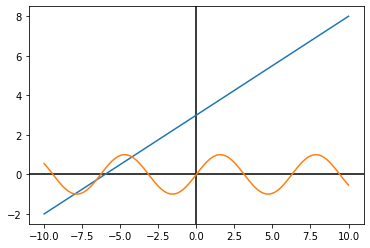

In [65]:
def f(x):
    return 0.5 * x + 3
def g(x):
    return sin(x)
plot([f,g],-10,10)

In [66]:
def add_functions(f,g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

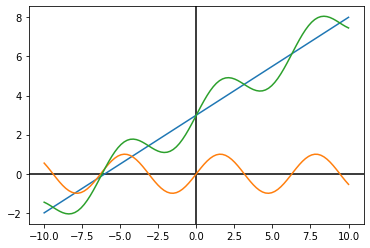

In [67]:
plot([f, g, add_functions(f,g)], -10, 10)

In [68]:
def scale_function(f, scalar):
    def new_function(x):
        return f(x) * scalar
    return new_function

In [69]:
f(2), scale_function(f,2)(2)

(4.0, 8.0)

### 6.2.4 Treating matrices as vectors

In [30]:
class Matrix5_by_3(Vector):
    rows = 5 #1
    columns = 3
    def __init__(self, matrix):
        self.matrix = matrix
    def add(self, other):
        return Matrix5_by_3(tuple(
            tuple(a + b for a,b in zip(row1, row2))
            for (row1, row2) in zip(self.matrix, other.matrix)
        ))
    def scale(self,scalar):
        return Matrix5_by_3(tuple(
            tuple(scalar * x for x in row)
            for row in self.matrix
        ))
    @classmethod
    def zero(cls):
        return Matrix5_by_3(tuple( #2
            tuple(0 for j in range(0, cls.columns))
            for i in range(0, cls.rows)
        ))

### 6.2.5 Manipulating images with vector operations

In [31]:
from PIL import Image
class ImageVector(Vector):

    size = (300,300) #1

    def __init__(self,input):
        try:
            img = Image.open(input).resize(ImageVector.size) #2
            self.pixels = img.getdata()
        except:
            self.pixels = input #3

    def image(self):
        img = Image.new('RGB', ImageVector.size) #4
        img.putdata([(int(r), int(g), int(b)) 
                     for (r,g,b) in self.pixels])
        return img

    def add(self,img2): #5
        return ImageVector([(r1+r2,g1+g2,b1+b2) 
                            for ((r1,g1,b1),(r2,g2,b2)) 
                            in zip(self.pixels,img2.pixels)])
    def scale(self,scalar): #6
        return ImageVector([(scalar*r,scalar*g,scalar*b) 
                      for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls): #7
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0,total_pixels)])
        
    def _repr_png_(self): #8
        return self.image()._repr_png_()

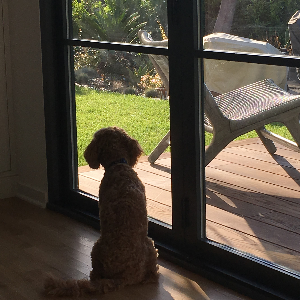

In [32]:
ImageVector('inside.JPG')

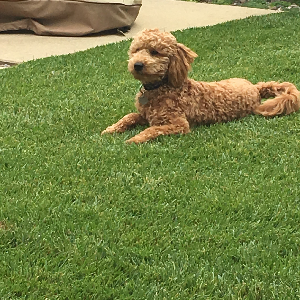

In [73]:
ImageVector('outside.JPG')

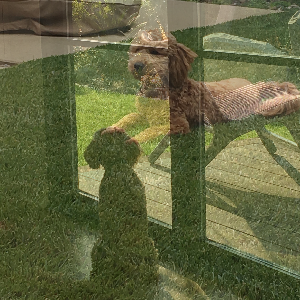

In [74]:
0.5 * ImageVector("inside.JPG") + 0.5 * ImageVector("outside.JPG")

In [75]:
white = ImageVector([(255,255,255) for _ in range(0,300*300)])

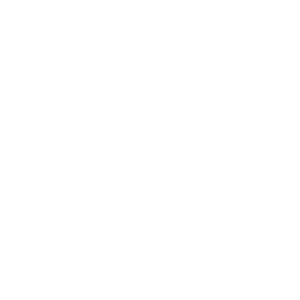

In [76]:
white

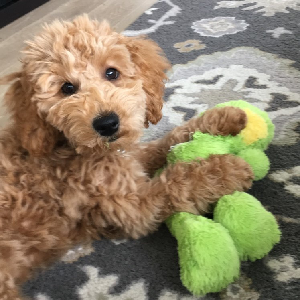

In [77]:
melba_toy = ImageVector("melba_toy.jpg")
melba_toy

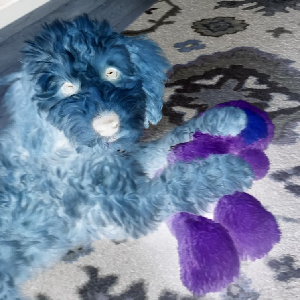

In [78]:
melba_negative = white - ImageVector("melba_toy.jpg")
melba_negative

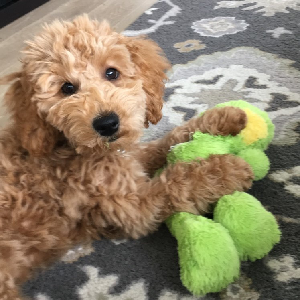

In [79]:
white - melba_negative

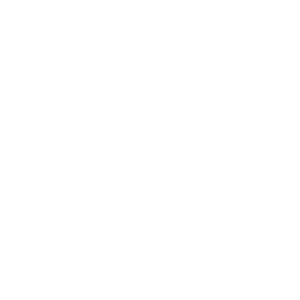

In [80]:
melba_negative + melba_toy

### 6.2.6 Exercises

EXERCISE: Run the vector space unit tests with u, v, and w as floats rather than objects inheriting Vector. This demonstrates that real numbers are indeed vectors.

In [34]:
from math import isclose
from random import uniform

def random_scalar():
    return uniform(-10, 10)

def test(zero, eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    #new tests
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_scalar(), random_scalar(), random_scalar()
    test(0, isclose, a,b,u,v,w)

Mini-project 6.9: Run the vector space unit tests for CarForSale to show its objects form a vector space (ignoring their textual attributes).

In [35]:
from math import isclose
from random import uniform, random, randint
from datetime import datetime, timedelta

def random_time():
    return CarForSale.retrieved_date - timedelta(days=uniform(0,10))

def approx_equal_time(t1, t2):
    test = datetime.now()
    return isclose((test-t1).total_seconds(), (test-t2).total_seconds())

def random_car():
    return CarForSale(randint(1990,2019), randint(0,250000), 
              27000. * random(), random_time())

def approx_equal_car(c1,c2):
    return (isclose(c1.model_year,c2.model_year) 
            and isclose(c1.mileage,c2.mileage) 
            and isclose(c1.price, c2.price)
            and approx_equal_time(c1.posted_datetime, c2.posted_datetime))
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_car(), random_car(), random_car()
    test(CarForSale.zero(), approx_equal_car, a,b,u,v,w)

Exercise 6.10: Implement the class Function(Vector) that takes a function of one variable as an argument to its constructor and implement a `__call__` method so you can treat it as a function. You should be able to run `plot([f,g,f+g,3*g],-10,10)`.

What is `__call__`? https://www.python-course.eu/python3_magic_methods.php

In [83]:
# is function callable?
a = 5
b = lambda x: x**2
callable(a), callable(b)

(False, True)

In [84]:
class FoodSupply():
    def __call__(self):
        return 'spam'

foo = FoodSupply()
bar = FoodSupply()

foo(), bar()

('spam', 'spam')

In [85]:
class Callable1():
    def __init__(self, x):
        self.x = x

    def __call__(self):
        return self.x

f = Callable1(3)
f()

3

In [86]:
class Callable2():
    def __init__(self, x):
        self.x = x

callable(Callable2(3))


False

In [87]:
class TriangleArea():

    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        return result

In [88]:
area = TriangleArea()
area(3,4,5)

6.0

In [36]:
class StraightLines():
    def __init__(self, a, b):
        self.slope = a
        self.intercept = b

    def __call__(self, x):
        return self.slope * x + self.intercept

line = StraightLines(0.4, 3)
lines = [line(x) for x in range(0,10)]

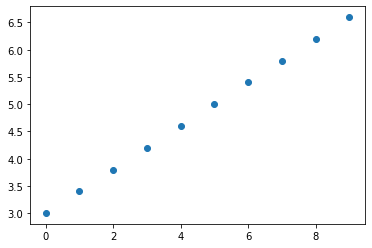

In [90]:
import matplotlib.pyplot as plt

plt.scatter(range(0,10), lines)

In [40]:
class Function(Vector):
    def __init__(self, f):
        self.function = f
    
    def add(self, other):
        return Function(lambda x: self.function(x) + other.function(x))

    def scale(self, scalar):
        return Function(lambda x : self.function(x) * scalar)
    
    @classmethod
    def zero(cls):
        return Function(lambda x: 0)

    def __call__(self, arg):
        return self.function(arg)

In [16]:
from math import cos, sin, pi

f = Function(cos)
g = Function(sin)
f(0), f(0)*2, f(0) + g(pi/2)

(1.0, 2.0, 2.0)

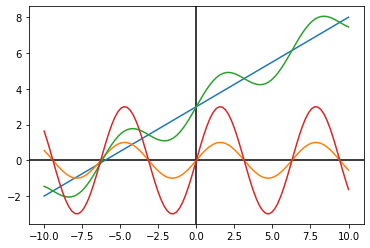

In [19]:
f = Function(lambda x: 0.5 * x + 3)
g = Function(sin)

plot([f, g, f+g, 3*g], -10, 10)

In [37]:
class Research():
    def __init__(self, f):
        self.function = f

    def scale1(self, scalar):
        return (lambda x: self.function(x) * scalar)
    
    def scale2(self, scalar):
        return Research(lambda x: self.function(x) * scalar)

    def scale3(self, scalar):
        def new_function(x):
            return self.function(x) * scalar
        return Research(new_function) 

    def __call__(self, arg):
        return self.function(arg)

In [95]:
print(Research(cos).scale1(2)) 
print(Research(cos).scale2(2))
print(Research(cos).scale3(2))
print(Research(cos))

<function Research.scale1.<locals>.<lambda> at 0x7f7876b89290>


In [96]:
f1 = Research(cos).scale1(2)
f1(0)

2.0

In [97]:
f2 = Research(cos).scale2(2)
f2(0)

2.0

In [98]:
f3 = Research(cos).scale3(2)
f3(0)

2.0

**MINI-PROJECT:** Testing equality of functions is difficult.  Do your best to write a function to test whether two functions are equal.

In [42]:
from random import uniform
from math import isclose

def approx_equal_func(f,g):
    results = []
    for range in (0,10):
        x = uniform(-10, 10)
        results.append(isclose(f(x), g(x)))
    return all(results)

approx_equal_func(lambda x: (x*x)/x, lambda x: x)

True

**MINI-PROJECT:** Unit test your Function class to demonstrate that functions satisfy the vector space properties.

In [43]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
    def _repr_latex_(self):
        monomials = [repr(coefficient) if power == 0 
                               else "x ^ {%d}" % power if coefficient == 1
                               else "%s x ^ {%d}" % (coefficient,power) 
                               for (power,coefficient) in enumerate(self.coefficients) 
                               if coefficient != 0]
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

def random_function():
    degree = randint(0,5)
    p = Polynomial(*[uniform(-10,10) for _ in range(0,degree)])
    return Function(lambda x: p(x))

from random import randint
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_function(), random_function(), random_function()
    test(Function.zero(), approx_equal_func, a,b,u,v,w)

**MINI-PROJECT:** Implement a class `Function2(Vector)` that stores a function of two variables, like $f(x,y) = x + y.$

In [44]:
class Function2(Vector):
    def __init__(self, f):
        self.function = f

    def add(self, other):
        return Function2(lambda x,y: self.function(x,y) + other.function(x,y))

    def scale(slef, scalar):
        return Function2(lambda x,y: self.function(x,y) * scalar)

    @classmethod
    def zero(self):
        return Function2(lambda x,y: 0)

    def __call__(self, arg1, arg2):
        return self.function(arg1, arg2)

In [102]:
f2 = Function2(lambda x,y: x + y)
f2(1, 2)

3

In [103]:
f = Function2(lambda x,y:x+y)
g = Function2(lambda x,y: x-y+1)
(f+g)(3,10)

7

**MINI-PROJECT:** Implement a `Matrix` class inheriting from `Vector` with abstract properties representing number of rows and number of columns.  You should not be able to instantiate a Matrix class, but you could make a `Matrix5_by_3` by inheriting from Matrix and specifying the number of rows and columns explicitly.

In [45]:
class Matrix(Vector):
    @abstractproperty
    def rows(self):
        pass
    @abstractproperty
    def columns(self):
        pass
    def __init__(self,entries):
        self.entries = entries
    def add(self,other):
        return self.__class__(
            tuple(
                tuple(self.entries[i][j] + other.entries[i][j]
                        for j in range(0,self.columns()))
                for i in range(0,self.rows())))
    def scale(self,scalar):
        return self.__class__(
            tuple(
                tuple(scalar * e for e in row) 
                for row in self.entries))
    def __repr__(self):
        return "%s%r" % (self.__class__.__qualname__, self.entries)
    def zero(self):
        return self.__class__(
            tuple(
                tuple(0 for i in range(0,self.columns())) 
                for j in range(0,self.rows())))

In [106]:
class Matrix2_by_2(Matrix):
    def rows(self):
        return 2
    def columns(self):
        return 2  

In [107]:
2 * Matrix2_by_2(((1,2),(3,4))) + Matrix2_by_2(((1,2),(3,4)))

Matrix2_by_2((3, 6), (9, 12))

**EXERCISE:** Unit test the `Matrix5_by_3` class to demonstrate that it obeys the defining properties of a vector space.

In [46]:
def random_matrix(rows, columns):
    return tuple(
        tuple(uniform(-10,10) for j in range(0,columns))
        for i in range(0,rows)
    )

def random_5_by_3():
    return Matrix5_by_3(random_matrix(5,3))
    
def approx_equal_matrix_5_by_3(m1,m2):
    return all([
        isclose(m1.matrix[i][j],m2.matrix[i][j]) 
        for j in range(0,3)
        for i in range(0,5)
    ])
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_5_by_3(), random_5_by_3(), random_5_by_3()
    test(Matrix5_by_3.zero(), approx_equal_matrix_5_by_3, a,b,u,v,w)

**EXERCISE:** Convince yourself that the “`zero`” vector for the `ImageVector` class doesn’t visibly alter any image when it is added.

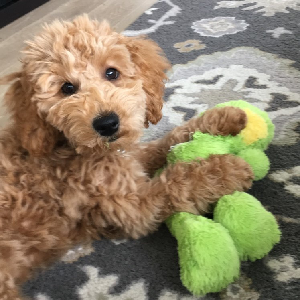

In [113]:
ImageVector('melba_toy.jpg')

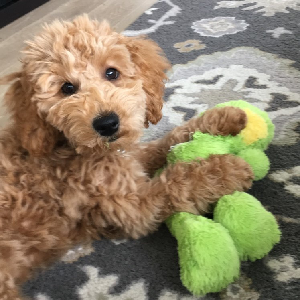

In [115]:
# unchanged
ImageVector("melba_toy.jpg") + ImageVector.zero()

**EXERCISE:** Pick two images and display 10 different weighted averages of them.  These will be “points on a line segment” connecting the images in 270,000-dimensional space!

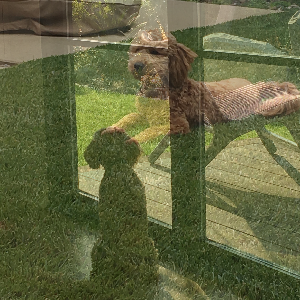

In [119]:
0.5 * ImageVector('inside.JPG') + 0.5 * ImageVector('outside.JPG')

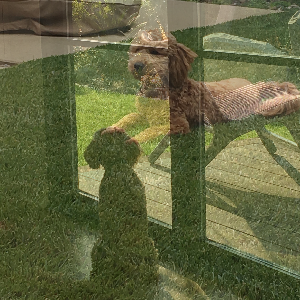

In [132]:
x = ImageVector('inside.JPG')
y = ImageVector('outside.JPG')

linear_comb = [(0.1 * s * x + (1 - 0.1 * s) * y) for s in range(0, 11)]
linear_comb[5]

In [133]:
def random_image():
    return ImageVector([(randint(0,255), randint(0,255), randint(0,255))
                            for i in range(0,300 * 300)])

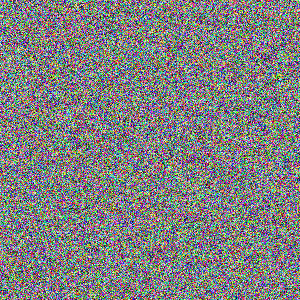

In [134]:
random_image()

In [135]:
def approx_equal_image(i1,i2):
    return all([isclose(c1,c2)
        for p1,p2 in zip(i1.pixels,i2.pixels)
        for c1,c2 in zip(p1,p2)])

In [136]:
## takes a while to run, but succeeds
# for i in range(0,100):
#     a,b = random_scalar(), random_scalar()
#     u,v,w = random_image(), random_image(), random_image()
#     test(ImageVector.zero(), approx_equal_image, a,b,u,v,w)

## 6.3 Looking for smaller vector spaces

### 6.3.1 Identifying subspaces

### 6.3.2 Starting with a single vector

### 6.3.3 Spanning a bigger space

### 6.3.4 Defining the word dimension

### 6.3.5 Finding subspaces of the vector space of functions

In [30]:
class LinearFunction(Vector):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def add(self, other):
        return LinearFunction(self.a + other.a, self.b + other.b)
    
    def scale(self, scalar):
        return LinearFunction(self.a * scalar, self.b * scalar)
    
    def __call__(self, x):
        return self.a * x + self.b

    @classmethod
    def zero(cls):
        return LinearFunction(0,0,0)

In [29]:
f = LinearFunction(2,3)
g = LinearFunction(3,4)

f(5) + g(5)

32

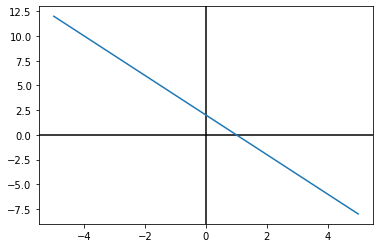

In [33]:
plot([LinearFunction(-2,2)], -5, 5)

### 6.3.6 Subspaces of images

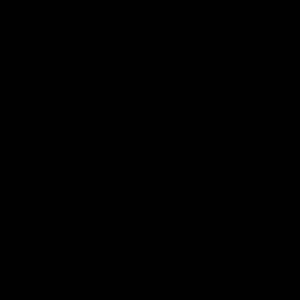

In [11]:
gray = ImageVector([(1,1,1) for _ in range(0,300*300)])
gray

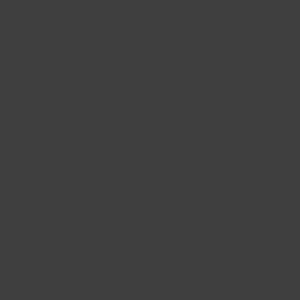

In [12]:
63 * gray

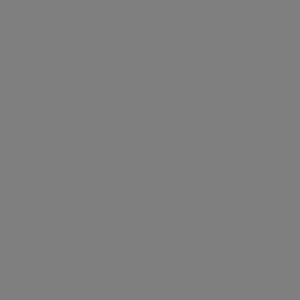

In [13]:
127 * gray

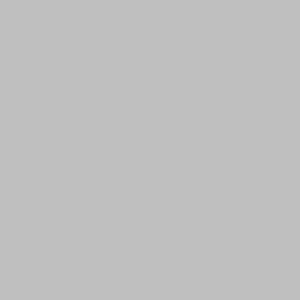

In [14]:
191 * gray

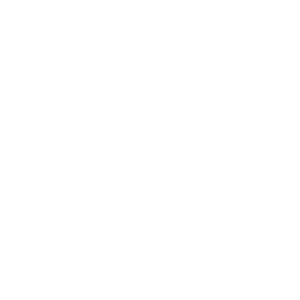

In [15]:
255 * gray

### TODO: cemu sve ove klase vektora, za koje operacije se pripremamo? popisi sve klase u ovom poglavlji pitaj se cemu one sluze.

### 6.3.7 Exercises

**EXERCISE:** Rebuild the `LinearFunction` class by inheriting from `Vec2` and simply implementing the `__call__` method.

In [22]:
class LinearFunction(Vec2):
    def __call__(self,input):
        return self.x * input + self.y

**MINI-PROJECT:** Implement a class `QuadraticFunction(Vector)` representing the vector subspace of functions of the form $ax^2 + bx + c$.  What is a basis for this subspace?

In [26]:
class QuadraticFunction(Vector):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def add(self, other):
        return QuadraticFunction(self.a + other.a, self.b + other.b, self.c + other.c)

    def scale(self, scalar):
        return QuadraticFunction(self.a * scalar, self.b * scalar, self.c * scalar)

    def __call__(self, x):
        return self.a * x**2 + self.b * x + self.c
    
    @classmethod
    def zero(cls):
        return QuadraticFunction(0,0,0)

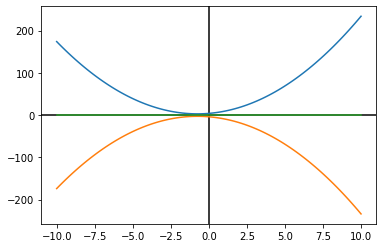

In [129]:
q1 = QuadraticFunction(2,3,4)
q2 = QuadraticFunction(-2,-3,-4)
plot([q1, q2, q1 + q2], -10, 10)

**MINI-PROJECT:** Vector space of all polynomials is an infinite-dimensional subspace -- implement it and describe a basis (which will need to be an infinite set!)

In [204]:
# my way
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients

    def add(self, other):
        return Polynomial([c1 + c2 
                            for c1,c2 
                            in zip(self.coefficients, other.coefficients)])

    def scale(self, scalar):
        return Polynomial([scalar * c
                            for c in self.coefficients])

    def __call__(self, x):
        r = []
        for i,c in enumerate(self.coefficients):
            exponent = len(self.coefficients) - (i+1)
            if exponent != 0:
                r.append(c * x ** exponent)
            else:
                r.append(c)
        return sum(r)

    @classmethod
    def zero(cls):
        return Polynomial(0)

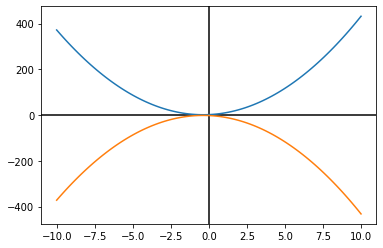

In [217]:
p1 = Polynomial(2,3,4)
p2 = Polynomial(-2,-3,-4)
#p1(1), p2(1)
plot([p1, p2], -10, 10)

In [218]:
plot([p1, p2, p1 + p2], -10, 10)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [212]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

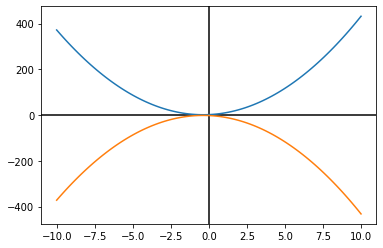

In [215]:
p1 = Polynomial(2,3,4)
p2 = Polynomial(-2,-3,-4)
plot([p1, p2], -10, 10)

In [219]:
plot([p1, p2, p1 + p2], -10, 10)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

**EXERCISE:** Write a function `solid_color(r,g,b)` that returns an solid color `ImageVector` with the given red, green, and blue content at every pixel.

In [47]:
def solid_color(r,g,b):
    return ImageVector([(r,g,b) for _ in range(0, 300*300)])

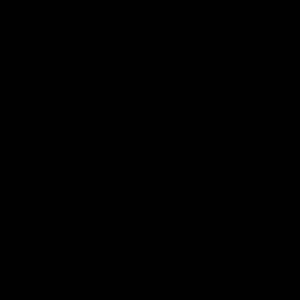

In [225]:
solid_color(1,1,1)

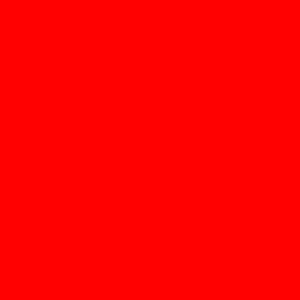

In [226]:
solid_color(255,1,1)

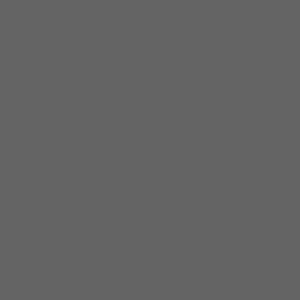

In [230]:
solid_color(100,100,100)

**MINI-PROJECT:** Write a linear map that generates an `ImageVector` from a 30 by 30 grayscale image, implemented as a 30 by 30 matrix of brightness values.  Then, implement the linear map that takes a 300 by 300 image to a 30 by 30 grayscale image by averaging the brightness (average of red, green and blue) at each pixel.

**what is linear map, what does it mean?**

In [405]:
def lin_map_hi(img_lo_data, size_lo, size_hi):
    img_hi_data = []
    for row in range(0, size_hi[0]):
        for col in range(0,size_hi[1]):
            row_index = row // (size_hi[0] // size_lo[0])
            col_index = col // (size_hi[1] // size_lo[0])
            img_hi_data.append(img_lo_data[row_index][col_index])
    return img_hi_data

In [413]:
from random import uniform

size_low = (30, 30)
img1_lo_data = [tuple(uniform(0,256) for row in range(0, size_low[0])) 
                for col in range(0, size_low[1])]
print(img1_lo_data[0])

(234.48202030091375, 158.4988586952913, 157.1666336896836, 175.86213084654403, 157.7329831265231, 23.731749563095974, 224.18221013108268, 191.7045544245295, 171.18385904479072, 169.26263996915492, 149.24483704473906, 18.194230136666903, 18.18874637499198, 30.85630008700167, 100.51758938495374, 80.88283033812564, 90.14964154436032, 249.11882353981068, 231.37875758468832, 78.60871413858231, 200.8527944489107, 35.09938673377573, 62.7751259169338, 177.75224774389096, 77.87693103860681, 131.17193495981164, 201.75268168676237, 143.63798656158883, 0.3920492908508777, 43.864002372194534)


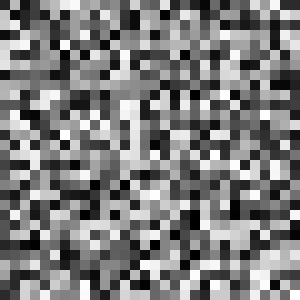

In [407]:
size_high = (300,300)

img1_hi_data = lin_map_hi(img1_lo_data, size_low, size_high)

img_hi = Image.new('L', size_high)
img_hi.putdata(img1_hi_data)
img_hi

In [604]:
l = list(range(9,18))
print(f'l = {l}, len(l) = {len(l)}')

s = [i for i in range(0, len(l), len(l)//3)]
print(f's = {s}')

t = [tuple(l[i:(i+len(l)//3)]) for i in range(0, len(l), len(l)//3)]
print(f't = {t}')

l = [9, 10, 11, 12, 13, 14, 15, 16, 17], len(l) = 9
s = [0, 3, 6]
t = [(9, 10, 11), (12, 13, 14), (15, 16, 17)]


In [598]:
def to_matrix(img_data, columns):
    stop = len(img_data)
    step = len(img_data)//columns
    return [tuple(img_data[i:i+step]) for i in range(0, stop, step)]

In [599]:
size_low = (30,30)
melba_lo = Image.open('melba_face.jpg').resize(size_low)
melba_lo = melba_lo.convert('L')
melba_lo_data_array = list(melba_lo.getdata())
print(melba_lo_data_array[:30])
melba_lo

[203, 192, 250, 159, 151, 142, 150, 142, 147, 98, 155, 157, 171, 154, 158, 177, 162, 162, 161, 159, 163, 163, 160, 161, 167, 166, 138, 107, 111, 114]


In [600]:
melba_lo_data = to_matrix(melba_lo_data_array, size_low[0])
print(melba_lo_data[0])

(203, 192, 250, 159, 151, 142, 150, 142, 147, 98, 155, 157, 171, 154, 158, 177, 162, 162, 161, 159, 163, 163, 160, 161, 167, 166, 138, 107, 111, 114)


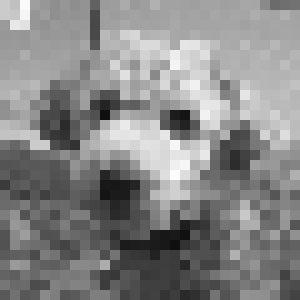

In [601]:
size_high = (300,300)

melba_hi_data = lin_map_hi(melba_lo_data, size_low, size_high)

melba_hi = Image.new('L', size_high)
melba_hi.putdata(melba_hi_data)
melba_hi